# Sơ đồ phát triển các thuật toán tối ưu hóa

Hình dưới đây mô tả mối quan hệ và tiến hóa giữa các thuật toán tối ưu hóa phổ biến trong học sâu:

1. **GD (Gradient Descent)**: Thuật toán cơ bản dùng để cập nhật tham số theo hướng gradient của hàm mất mát.

2. **SGD (Stochastic Gradient Descent)**: Phiên bản ngẫu nhiên của GD, cập nhật tham số theo từng batch nhỏ, giúp tăng tốc hội tụ và tránh bị kẹt tại cực trị địa phương.

3. **Momentum**: Mở rộng từ SGD bằng cách tích lũy gradient trước đó để tăng tốc hội tụ, giảm dao động.

4. **AdaGrad**: Cập nhật learning rate theo từng tham số riêng lẻ dựa trên lịch sử gradient, thích hợp với dữ liệu thưa thớt.

5. **RMSprop**: Cải thiện AdaGrad bằng cách sử dụng trung bình động của bình phương gradient, giúp tránh learning rate giảm quá nhanh.

6. **Adam**: Kết hợp Momentum và RMSprop, sử dụng trung bình động của cả gradient và bình phương gradient, hiện là thuật toán tối ưu phổ biến nhất nhờ hội tụ nhanh và ổn định.



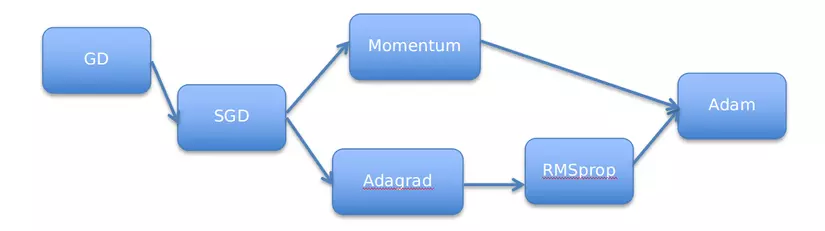

[Machine Learning cơ bản - Bài 8: Gradient Descent (phần 2/2)](https://machinelearningcoban.com/2017/01/16/gradientdescent2)

[Viblo - Optimizer- Hiểu sâu về các thuật toán tối ưu ( GD,SGD,Adam,..)](https://viblo.asia/p/optimizer-hieu-sau-ve-cac-thuat-toan-toi-uu-gdsgdadam-Qbq5QQ9E5D8#_2-stochastic-gradient-descent-sgd-3)

## **Optimizers là gì và tại sao dùng**  

Optimizers là các thuật toán dùng để **cập nhật tham số của mô hình** nhằm **giảm giá trị hàm loss** và giúp mô hình học hiệu quả. Chúng sử dụng **gradient của loss** để điều chỉnh weights theo hướng giảm lỗi.  

**Tại sao cần dùng:**  
- Giúp mô hình **học nhanh và ổn định**.  
- Hỗ trợ **adaptive learning rate** cho từng tham số.  
- Tránh hiện tượng **nhảy loạn hoặc hội tụ chậm**.  

**Ví dụ minh họa thực tế:**  
Bài toán: **dự đoán giá nhà**  

| Area (m²) | Bedrooms | Price (triệu đồng) |
|------------|---------|------------------|
| 50         | 2       | 1000             |
| 70         | 3       | 1500             |
| 60         | 2       | 1200             |

**Minh họa cách optimizer hoạt động:**  

- **Bước 1:** khởi tạo weights ngẫu nhiên → mô hình dự đoán:  
  - 50m² → 800 triệu, sai số = 200 triệu  
  - 70m² → 1400 triệu, sai số = 100 triệu  

- **Bước 2:** optimizer cập nhật weights theo gradient → dự đoán mới:  
  - 50m² → 950 triệu, sai số = 50 triệu  
  - 70m² → 1470 triệu, sai số = 30 triệu  

- **Bước 3:** tiếp tục lặp → weights hội tụ, dự đoán gần với giá thật:  
  - 50m² → 1000 triệu, sai số ≈ 0  
  - 70m² → 1500 triệu, sai số ≈ 0  

Quá trình này minh họa **lần đầu dự đoán xa, optimizer điều chỉnh theo gradient → lần sau dự đoán gần hơn → loss giảm → mô hình chính xác hơn**.


## **Gradient Descent (GD) - Tổng quan**  

Gradient Descent là thuật toán tối ưu dùng để **tìm giá trị tối ưu của tham số mô hình** bằng cách **di chuyển theo hướng ngược gradient của hàm loss**.  




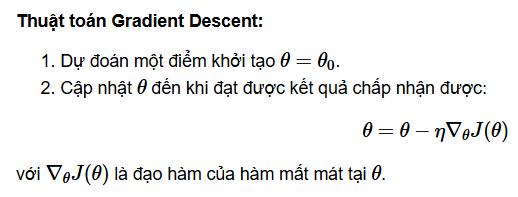

- **Nguyên lý:**  
  1. Tính gradient (đạo hàm) của hàm loss theo từng tham số.  
  2. Cập nhật tham số:  
     theta = theta - learning_rate * gradient  
     Trong đó:  
     - theta: vector các tham số của mô hình  
     - learning_rate: tốc độ học  
     - gradient: đạo hàm của loss theo theta  
  3. Lặp lại cho đến khi loss hội tụ hoặc đạt số bước tối đa.

- **Ưu điểm:**  
  - Thuật toán cơ bản, dễ hiểu.  
  - Đã giải quyết được vấn đề tối ưu cho mô hình neural network bằng cách cập nhật trọng số sau mỗi vòng lặp.

- **Nhược điểm:**  
  - Phụ thuộc vào **nghiệm khởi tạo ban đầu** và **learning rate**.  
  - Nếu hàm loss có nhiều cực tiểu toàn cục (global minimum), điểm khởi tạo khác nhau sẽ cho nghiệm cuối khác nhau.  
  - Learning rate quá lớn → không hội tụ, nhảy loạn quanh đích; quá nhỏ → training chậm.  
  - Phụ thuộc vào nhiều yếu tố khác như gradient phức tạp, dữ liệu lớn → quá trình hội tụ bị ảnh hưởng.

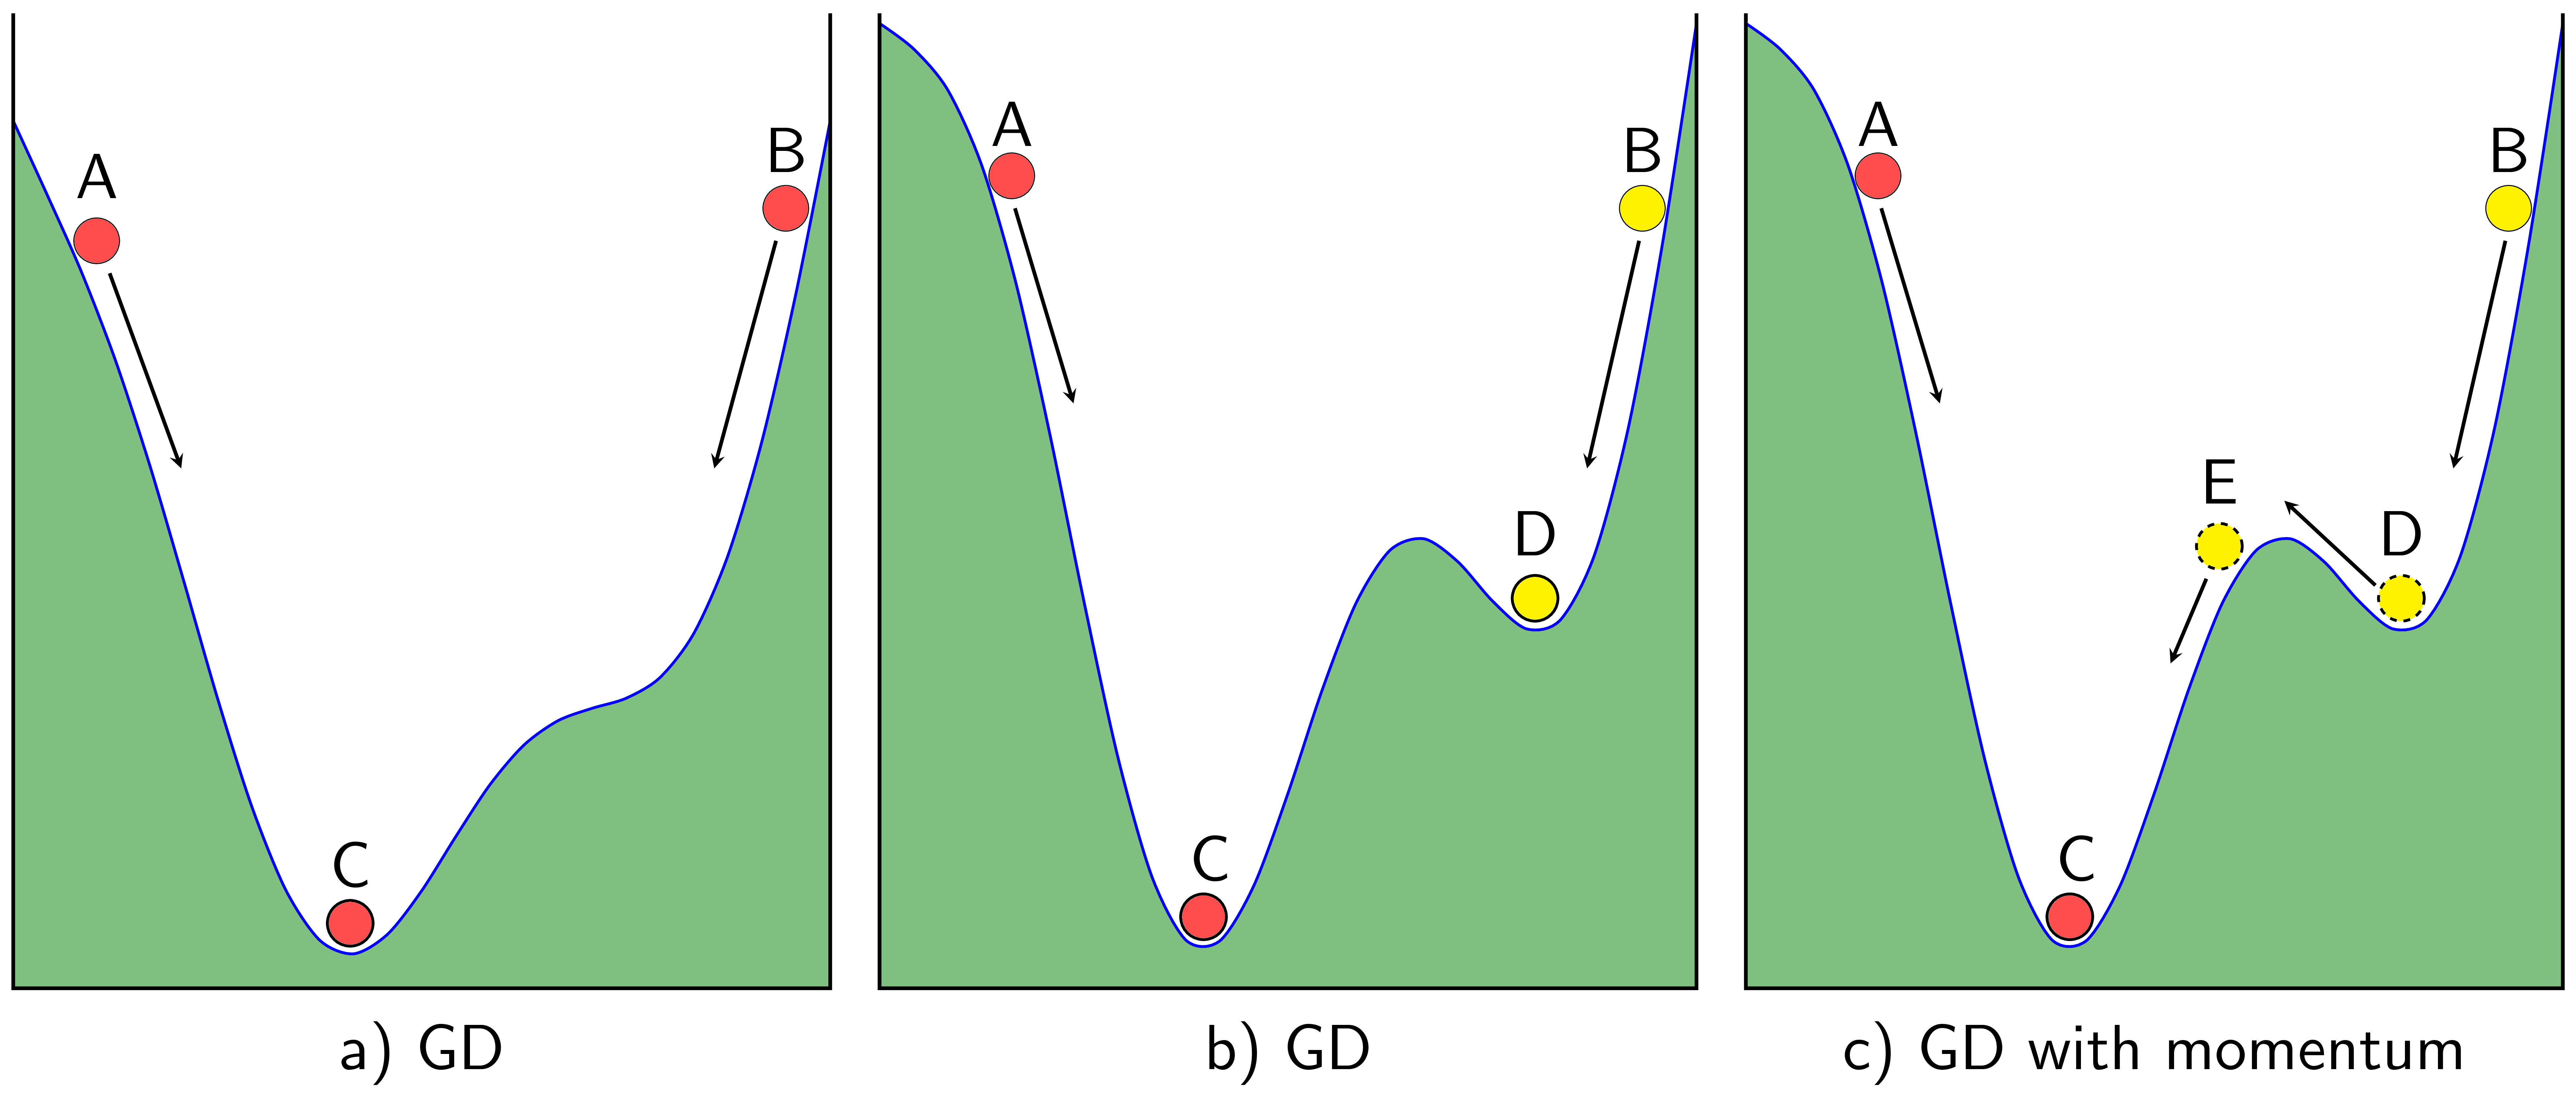

**Gradient Descent dưới góc nhìn vật lý**  

GD có thể hình dung như **hòn bi lăn trên bề mặt thung lũng**.  

- Nếu bề mặt đơn giản, bi đặt ở A hay B cuối cùng đều lăn xuống đáy C → nghiệm hội tụ ổn định.  
- Nếu bề mặt có **nhiều thung lũng**, bi đặt ở A hay B có thể dừng ở local minimum không mong muốn (C hoặc D).  
- Nếu bi có **vận tốc ban đầu lớn**, nó có thể vượt qua local minimum và lăn xuống global minimum → ý tưởng này dẫn tới **Momentum**, giúp GD tránh mắc kẹt tại điểm local và hội tụ tốt hơn.  

Từ Momentum, nhiều **optimizer hiện đại** được phát triển để cải thiện tốc độ và độ ổn định của GD.


## **Stopping Criteria - Điều kiện dừng trong Gradient Descent**  

Khi nào biết thuật toán đã hội tụ và dừng lại? Việc này quan trọng để **tiết kiệm thời gian tính toán** và **tránh cập nhật vô nghĩa khi gần nghiệm tối ưu**. Các phương pháp phổ biến:  

1. **Giới hạn số vòng lặp (epoch):**  
   - Dừng sau một số vòng nhất định.  
   - Ví dụ: dự đoán giá nhà với 1000 vòng lặp, dù loss chưa tối thiểu tuyệt đối, thuật toán vẫn dừng.  
   - **Tại sao:** đảm bảo chương trình không chạy quá lâu, đặc biệt khi dataset lớn.  
   - **Nhược điểm:** có thể dừng sớm trước khi đạt nghiệm tốt nhất.  

2. **So sánh gradient giữa hai lần cập nhật:**  
   - Dừng khi gradient đủ nhỏ.  
   - Ví dụ: đạo hàm nhỏ hơn 0.001 → coi như hội tụ.  
   - **Tại sao:** gradient nhỏ nghĩa là tham số gần nghiệm tối ưu, tiếp tục cập nhật không giúp cải thiện nhiều.  
   - **Nhược điểm:** với dữ liệu lớn hoặc SGD/mini-batch, tính gradient đầy đủ mỗi vòng phức tạp.  

3. **So sánh giá trị hàm Losss giữa hai lần cập nhật:**  
   - Dừng khi loss thay đổi rất ít, ví dụ < 1e-4.  
   - **Tại sao:** loss ổn định nghĩa là mô hình đã hội tụ, tiếp tục cập nhật ít hiệu quả.  
   - **Nhược điểm:** có thể dừng nhầm tại **saddle point**, vùng phẳng nhưng chưa phải cực trị.  

- Với **SGD và mini-batch GD**, thường so sánh nghiệm sau vài lần cập nhật (ví dụ mỗi 10 lần) để **cân bằng giữa tốc độ hội tụ và chi phí tính toán**, mang lại hiệu quả thực tế tốt.


## **Adagrad & RMSprop – Tiền đề cho tối ưu hóa thông minh**

- **Adagrad (Adaptive Gradient Algorithm):**  
  Là thuật toán tối ưu **tự động điều chỉnh learning rate cho từng tham số** dựa trên lịch sử gradient. Những tham số ít được cập nhật sẽ có learning rate lớn hơn, giúp học nhanh hơn; tham số thường xuyên cập nhật sẽ giảm learning rate để tránh nhảy quá lớn.  
  - **Vấn đề:** learning rate giảm dần quá nhanh, có thể khiến thuật toán dừng sớm.  

- **RMSprop (Root Mean Square Propagation):**  
  Là cải tiến của Adagrad, **giữ một moving average của bình phương gradient** thay vì cộng dồn tất cả, nhờ đó tránh learning rate giảm quá nhanh.  
  - **Ý nghĩa:** cho phép mô hình tiếp tục học lâu dài mà không bị dừng sớm do learning rate quá nhỏ.  

- **Tại sao:** RMSprop ra đời để khắc phục nhược điểm của Adagrad, đặc biệt hữu ích với **học sâu (deep learning) và dữ liệu lớn**.


## Implementation

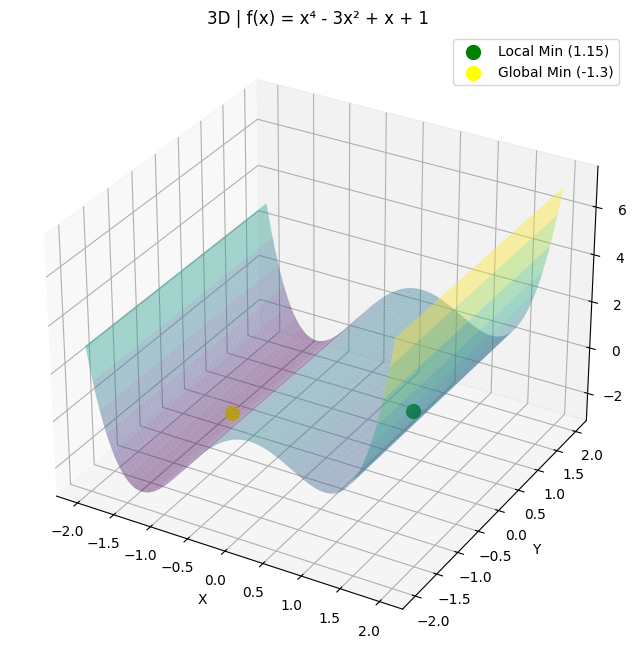

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Hàm 1D gốc
def f(x):
    return x**4 - 3*x**2 + x + 1

# Tạo lưới 2D nhưng giữ nguyên hàm 1D
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 50)              # chiều y để trực quan hóa
X, Y = np.meshgrid(x, y)
Z = f(X)                                # chỉ phụ thuộc vào X, Z giống nhau theo Y
# Vẽ bề mặt 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.4)

# Đánh dấu Global và Local Min
global_min_x = 1.15
local_min_x = -1.3
ax.scatter(global_min_x, 0, f(global_min_x), color='green', s=100, label='Local Min (1.15)')
ax.scatter(local_min_x, 0, f(local_min_x), color='yellow', s=100, label='Global Min (-1.3)')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X)')
ax.set_title('3D | f(x) = x⁴ - 3x² + x + 1')
ax.legend()
plt.show()

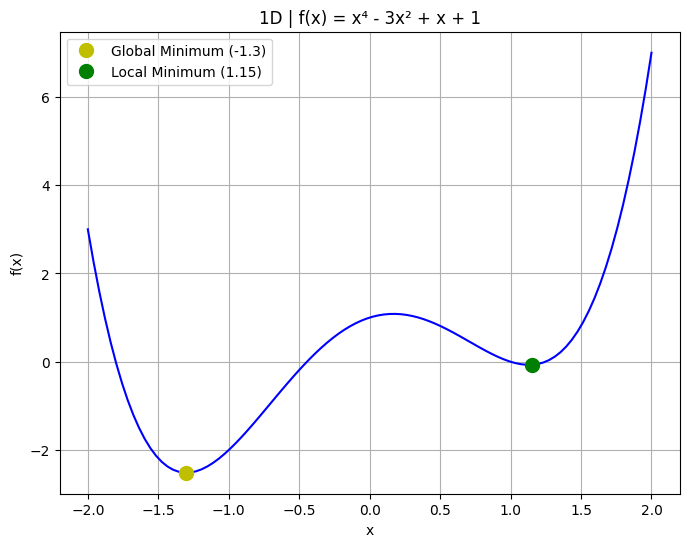

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa hàm 1D có local và global minimum
def function(x):
    return x**4 - 3*x**2 + x + 1

# Tạo dữ liệu để vẽ
x = np.linspace(-2, 2, 100)         # Tạo mảng x từ -2 đến 2
y = function(x)

# Tạo biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue')

# Local minimum
local_min_x = -1.3
local_min_y = function(local_min_x)
plt.plot(local_min_x, local_min_y, 'yo', label='Global Minimum (-1.3)', markersize=10)

# Global minimum
global_min_x = 1.15
global_min_y = function(global_min_x)
plt.plot(global_min_x, global_min_y, 'go', label='Local Minimum (1.15)', markersize=10)

# Thêm chú thích và tiêu đề
plt.title('1D | f(x) = x⁴ - 3x² + x + 1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

### **Adagrad (Adaptive Gradient) Optimizer Good Case**

Epoch 01: x=-0.5000, f(x)=-0.1875, adjusted_lr=0.5000
Epoch 02: x=-0.9808, f(x)=-1.9412, adjusted_lr=0.1374
Epoch 03: x=-1.3056, f(x)=-2.5137, adjusted_lr=0.1044
Epoch 04: x=-1.2984, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 05: x=-1.3020, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 06: x=-1.3003, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 07: x=-1.3011, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 08: x=-1.3007, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 09: x=-1.3009, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 10: x=-1.3008, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 11: x=-1.3009, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 12: x=-1.3008, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 13: x=-1.3008, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 14: x=-1.3008, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 15: x=-1.3008, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 16: x=-1.3008, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 17: x=-1.3008, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 18: x=-1.3008, f(x)=-2.5139, adjusted_lr=0.1044
Epoch 19: x=-1.3008, f(x)=-2

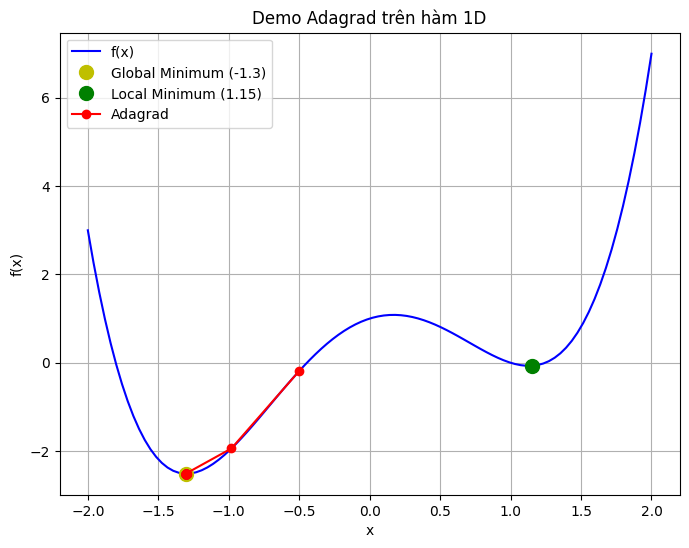

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm 1D và đạo hàm
def f(x):
    return x**4 - 3*x**2 + x + 1

def grad_f(x):
    return 4*x**3 - 6*x + 1

# Adagrad implementation
def adagrad_1d(x0, lr=0.1, epochs=30, epsilon=1e-8):
    x = x0
    G = 0
    history = []

    for epoch in range(epochs):
        g = grad_f(x)
        G += g**2
        adjusted_lr = lr / (np.sqrt(G) + epsilon)
        x = x - adjusted_lr * g
        history.append((x, f(x), adjusted_lr))
        print(f"Epoch {epoch+1:02d}: x={x:.4f}, f(x)={f(x):.4f}, adjusted_lr={adjusted_lr:.4f}")
    return history

# Khởi tạo
history = adagrad_1d(0, lr=0.5, epochs=50)

# Vẽ quá trình cập nhật trên đồ thị hàm
x_plot = np.linspace(-2, 2, 100)
y_plot = f(x_plot)
plt.figure(figsize=(8,6))
plt.plot(x_plot, y_plot, color='blue', label='f(x)')

# Local minimum
local_min_x = -1.3
local_min_y = function(local_min_x)
plt.plot(local_min_x, local_min_y, 'yo', label='Global Minimum (-1.3)', markersize=10)

# Global minimum
global_min_x = 1.15
global_min_y = function(global_min_x)
plt.plot(global_min_x, global_min_y, 'go', label='Local Minimum (1.15)', markersize=10)

# Quá trình cập nhật
x_hist = [h[0] for h in history]
y_hist = [h[1] for h in history]
plt.plot(x_hist, y_hist, 'ro-', label='Adagrad')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Demo Adagrad trên hàm 1D')
plt.grid(True)
plt.legend()
plt.show()

**Nhận xét**

Nếu khởi tạo tại **x=0** thì tạm chấp nhận được.

Nhưng nếu tại **x=2** phải đi qua local minimum rồi mới tới global minimum thì sao?

### **Adagrad Optimizer Worst Case**

Epoch 01: x=1.5000, f(x)=0.8125, adjusted_lr=0.0238
Epoch 02: x=1.3733, f(x)=0.2723, adjusted_lr=0.0230
Epoch 03: x=1.3022, f(x)=0.0905, adjusted_lr=0.0228
Epoch 04: x=1.2563, f(x)=0.0125, adjusted_lr=0.0227
Epoch 05: x=1.2248, f(x)=-0.0252, adjusted_lr=0.0227
Epoch 06: x=1.2021, f(x)=-0.0449, adjusted_lr=0.0226
Epoch 07: x=1.1855, f(x)=-0.0556, adjusted_lr=0.0226
Epoch 08: x=1.1730, f(x)=-0.0616, adjusted_lr=0.0226
Epoch 09: x=1.1636, f(x)=-0.0651, adjusted_lr=0.0226
Epoch 10: x=1.1563, f(x)=-0.0671, adjusted_lr=0.0226
Epoch 11: x=1.1508, f(x)=-0.0684, adjusted_lr=0.0226
Epoch 12: x=1.1464, f(x)=-0.0691, adjusted_lr=0.0226
Epoch 13: x=1.1431, f(x)=-0.0695, adjusted_lr=0.0226
Epoch 14: x=1.1405, f(x)=-0.0698, adjusted_lr=0.0226
Epoch 15: x=1.1384, f(x)=-0.0700, adjusted_lr=0.0226
Epoch 16: x=1.1368, f(x)=-0.0701, adjusted_lr=0.0226
Epoch 17: x=1.1355, f(x)=-0.0701, adjusted_lr=0.0226
Epoch 18: x=1.1346, f(x)=-0.0702, adjusted_lr=0.0226
Epoch 19: x=1.1338, f(x)=-0.0702, adjusted_lr=0.02

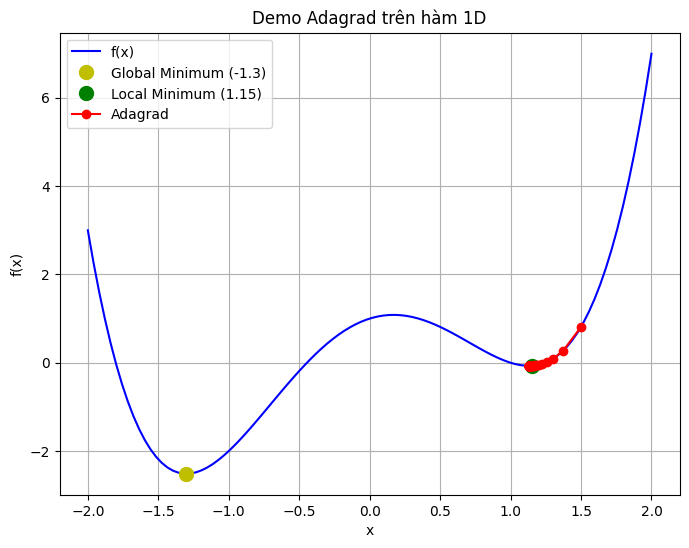

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm 1D và đạo hàm
def f(x):
    return x**4 - 3*x**2 + x + 1

def grad_f(x):
    return 4*x**3 - 6*x + 1

# Adagrad implementation
def adagrad_1d(x0, lr=0.1, epochs=30, epsilon=1e-8):
    x = x0
    G = 0
    history = []

    for epoch in range(epochs):
        g = grad_f(x)
        G += g**2
        adjusted_lr = lr / (np.sqrt(G) + epsilon)
        x = x - adjusted_lr * g
        history.append((x, f(x), adjusted_lr))
        print(f"Epoch {epoch+1:02d}: x={x:.4f}, f(x)={f(x):.4f}, adjusted_lr={adjusted_lr:.4f}")
    return history

# Khởi tạo
history = adagrad_1d(2, lr=0.5, epochs=50)

# Vẽ quá trình cập nhật trên đồ thị hàm
x_plot = np.linspace(-2, 2, 100)
y_plot = f(x_plot)
plt.figure(figsize=(8,6))
plt.plot(x_plot, y_plot, color='blue', label='f(x)')

# Local minimum
local_min_x = -1.3
local_min_y = function(local_min_x)
plt.plot(local_min_x, local_min_y, 'yo', label='Global Minimum (-1.3)', markersize=10)

# Global minimum
global_min_x = 1.15
global_min_y = function(global_min_x)
plt.plot(global_min_x, global_min_y, 'go', label='Local Minimum (1.15)', markersize=10)

# Quá trình cập nhật
x_hist = [h[0] for h in history]
y_hist = [h[1] for h in history]
plt.plot(x_hist, y_hist, 'ro-', label='Adagrad')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Demo Adagrad trên hàm 1D')
plt.grid(True)
plt.legend()
plt.show()

**Nhận xét**

- Khi bắt đầu gần local minimum, Adagrad **giảm learning rate nhanh** do tích lũy bình phương gradient.  
- Kết quả là **gradient nhỏ → bước đi quá nhỏ → kẹt tại local minimum**.  
- Không thể nhảy ra local minimum ở x ≈ 1.13 vì learning rate đã giảm quá nhiều.  
- Đây là **hạn chế chính của Adagrad**: dễ “kẹt” khi gặp các vùng gradient nhỏ (saddle hoặc local minimum).  

**Kết luận**: Adagrad ổn định nhưng **khó thoát local minimum** do learning rate giảm liên tục, đặc biệt trên landscape đa cực.


### **RMSprop (Root Mean Squared Propagation) Optimizer**

RMSprop là một **optimizer** cải tiến dựa trên **Adagrad**, nhằm giải quyết vấn đề tốc độ học giảm dần. Thay vì cộng dồn bình phương gradient từ đầu, RMSprop sử dụng **trung bình động của bình phương gradient** để điều chỉnh learning rate tại mỗi bước, giúp learning rate **ổn định hơn** trong quá trình training.

**Nguyên lý**
- RMSprop duy trì **trung bình động của bình phương gradient**:

$$
E[g^2]_t = \beta \, E[g^2]_{t-1} + (1-\beta) \, g_t^2
$$

- Cập nhật tham số theo công thức:

$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \, g_t
$$

Trong đó:  
- $$g_t = \nabla_\theta f(\theta_t)$$ là gradient tại bước t  
- $$\eta$$ là learning rate cơ bản  
- $$\epsilon$$ là hằng số nhỏ để tránh chia cho 0  
- $$\beta$$ là hệ số decay (thường 0.9)

**Ưu điểm**
- Giải quyết vấn đề tốc độ học giảm dần của Adagrad.
- Giúp training **ổn định và nhanh hơn** trong các landscape phức tạp.
- Phù hợp với **hàm mất mát không đồng nhất**, nơi gradient có biên độ khác nhau.

**Nhược điểm**
- RMSprop có thể dừng lại ở **local minimum**, không chắc chắn tìm được global minimum.
- Để cải thiện khả năng thoát local minimum, người ta thường kết hợp **Momentum + RMSprop**, tạo thành thuật toán **Adam**.

**Ý nghĩa**
- RMSprop là bước tiến quan trọng trong các optimizer hiện đại, đặc biệt với **neural network sâu**, vì nó giúp **hội tụ nhanh hơn, ổn định hơn**, đồng thời **giảm thiểu nguy cơ learning rate quá nhỏ** như trong Adagrad.

Epoch 01: x=0.4189, f(x)=0.9233, adjusted_lr=0.0753
Epoch 02: x=0.5154, f(x)=0.7890, adjusted_lr=0.0792
Epoch 03: x=0.6440, f(x)=0.5718, adjusted_lr=0.0832
Epoch 04: x=0.8008, f(x)=0.2883, adjusted_lr=0.0873
Epoch 05: x=0.9610, f(x)=0.0433, adjusted_lr=0.0915
Epoch 06: x=1.0780, f(x)=-0.0578, adjusted_lr=0.0962
Epoch 07: x=1.1244, f(x)=-0.0700, adjusted_lr=0.1014
Epoch 08: x=1.1308, f(x)=-0.0702, adjusted_lr=0.1069
Epoch 09: x=1.1309, f(x)=-0.0702, adjusted_lr=0.1127
Epoch 10: x=1.1309, f(x)=-0.0702, adjusted_lr=0.1188
Epoch 11: x=1.1309, f(x)=-0.0702, adjusted_lr=0.1252
Epoch 12: x=1.1309, f(x)=-0.0702, adjusted_lr=0.1319
Epoch 13: x=1.1309, f(x)=-0.0702, adjusted_lr=0.1391
Epoch 14: x=1.1309, f(x)=-0.0702, adjusted_lr=0.1466
Epoch 15: x=1.1309, f(x)=-0.0702, adjusted_lr=0.1545
Epoch 16: x=1.1309, f(x)=-0.0702, adjusted_lr=0.1629
Epoch 17: x=1.1309, f(x)=-0.0702, adjusted_lr=0.1717
Epoch 18: x=1.1309, f(x)=-0.0702, adjusted_lr=0.1810
Epoch 19: x=1.1309, f(x)=-0.0702, adjusted_lr=0.190

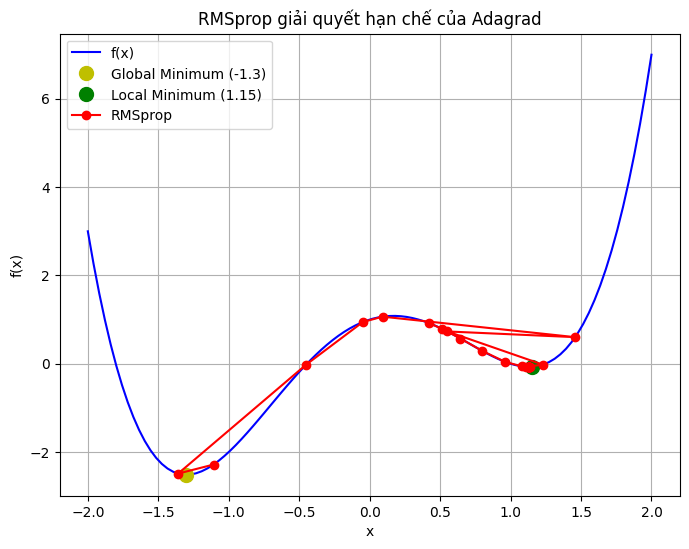

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm 1D và đạo hàm
def f(x):
    return x**4 - 3*x**2 + x + 1

def grad_f(x):
    return 4*x**3 - 6*x + 1

# RMSprop implementation
def rmsprop_1d(x0, lr=0.1, epochs=30, beta=0.9, epsilon=1e-8):
    x = x0
    S = 0  # moving average of squared gradients
    history = []

    for epoch in range(epochs):
        g = grad_f(x)
        S = beta * S + (1 - beta) * g**2
        adjusted_lr = lr / (np.sqrt(S) + epsilon)
        x = x - adjusted_lr * g
        history.append((x, f(x), adjusted_lr))
        print(f"Epoch {epoch+1:02d}: x={x:.4f}, f(x)={f(x):.4f}, adjusted_lr={adjusted_lr:.4f}")

    return history

# Khởi tạo từ x=2 (bên phải global minimum)
history_rms = rmsprop_1d(2, lr=0.5, epochs=50)

# Vẽ quá trình cập nhật
x_plot = np.linspace(-2, 2, 100)
y_plot = f(x_plot)
plt.figure(figsize=(8,6))
plt.plot(x_plot, y_plot, color='blue', label='f(x)')

# Local minimum
local_min_x = -1.3
local_min_y = function(local_min_x)
plt.plot(local_min_x, local_min_y, 'yo', label='Global Minimum (-1.3)', markersize=10)

# Global minimum
global_min_x = 1.15
global_min_y = function(global_min_x)
plt.plot(global_min_x, global_min_y, 'go', label='Local Minimum (1.15)', markersize=10)

x_hist = [h[0] for h in history_rms]
y_hist = [h[1] for h in history_rms]
plt.plot(x_hist, y_hist, 'ro-', label='RMSprop')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('RMSprop giải quyết hạn chế của Adagrad')
plt.grid(True)
plt.legend()
plt.show()

**Nhận xét**

- RMSprop **giải quyết hạn chế chính của Adagrad** nhờ sử dụng moving average của gradient bình phương, không làm learning rate giảm quá nhanh.  
- Quá trình cập nhật cho thấy RMSprop có thể **thoát local minimum**, di chuyển từ vùng gradient nhỏ sang global minimum.  
- Learning rate được **điều chỉnh linh hoạt** theo gradient hiện tại, giúp vượt các “vùng bẫy” của hàm.  
- Kết quả: RMSprop đạt global minimum (x ≈ -1.36) mặc dù bắt đầu từ **x=2**, trong khi Adagrad dễ kẹt ở local minimum.  

**Kết luận**: RMSprop **ổn định hơn Adagrad trên landscape có nhiều local minimum**, vẫn giữ khả năng hội tụ nhanh.


### **Adam (Adaptive Moment Estimation) Optimizer**


Adam (Adaptive Moment Estimation) là thuật toán tối ưu kết hợp **RMSprop** và **Momentum**, nhằm vừa duy trì learning rate thích ứng vừa tích hợp thông tin gradient trung bình động.  

**Nguyên lý**
- Adam duy trì hai moment của gradient:  
  1. **First moment (momentum)**: trung bình động của gradient
  $$
  m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t
  d$$  
  2. **Second moment (RMS)**: trung bình động của bình phương gradient
  $$
  v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2
  d$$

- Sửa bias để tránh khởi tạo tại 0:
$$
\hat{m}_t = \frac{m_t}{1-\beta_1^t}, \quad
\hat{v}_t = \frac{v_t}{1-\beta_2^t}
d$$

- Cập nhật tham số:
$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
d$$

Trong đó:  
- d$$g_t = \nabla_\theta f(\theta_t)$$ là gradient tại bước t  
- d$$\eta$$ là learning rate cơ bản  
- d$$\epsilon$$ là hằng số nhỏ để tránh chia cho 0  
- d$$\beta_1, \beta_2$$ là hệ số decay (thường 0.9 và 0.999)  

**Ưu điểm**
- Kết hợp cả **momentum** và **adaptive learning rate**, giúp convergence nhanh hơn.  
- Thường tìm được **global minimum tốt hơn RMSprop** trong nhiều trường hợp.  
- Phổ biến và ổn định trong deep learning.

**Nhược điểm**
- Có nhiều siêu tham số ($$\beta_1, \beta_2, \eta, \epsilon$$) cần tuning.  
- Trong một số bài toán **non-convex (có nhiều cực tiểu cục bộ)** phức tạp, Adam có thể **dao động quanh minimum** mà không hoàn toàn ổn định.

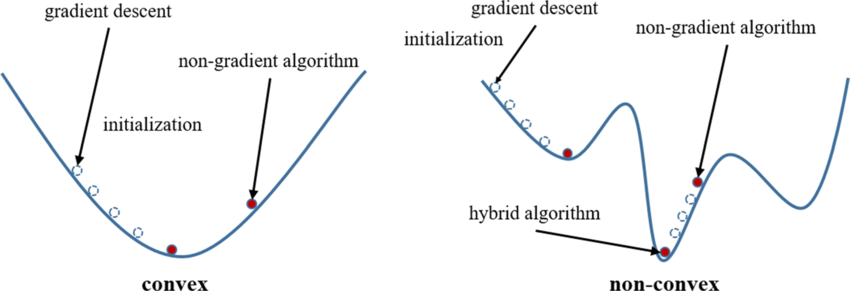

Epoch 01: x=1.5000, f(x)=0.8125
Epoch 02: x=1.0816, f(x)=-0.0594
Epoch 03: x=0.7645, f(x)=0.3526
Epoch 04: x=0.5298, f(x)=0.7666
Epoch 05: x=0.3517, f(x)=0.9960
Epoch 06: x=0.2095, f(x)=1.0798
Epoch 07: x=0.0879, f(x)=1.0648
Epoch 08: x=-0.0247, f(x)=0.9735
Epoch 09: x=-0.1373, f(x)=0.8065
Epoch 10: x=-0.2576, f(x)=0.5478
Epoch 11: x=-0.3918, f(x)=0.1712
Epoch 12: x=-0.5450, f(x)=-0.3479
Epoch 13: x=-0.7201, f(x)=-1.0069
Epoch 14: x=-0.9166, f(x)=-1.7313
Epoch 15: x=-1.1286, f(x)=-2.3273
Epoch 16: x=-1.3413, f(x)=-2.5019
Epoch 17: x=-1.5277, f(x)=-2.0822
Epoch 18: x=-1.6511, f(x)=-1.3976
Epoch 19: x=-1.6858, f(x)=-1.1349
Epoch 20: x=-1.6367, f(x)=-1.4970
Epoch 21: x=-1.5289, f(x)=-2.0773
Epoch 22: x=-1.3924, f(x)=-2.4499
Epoch 23: x=-1.2542, f(x)=-2.4989
Epoch 24: x=-1.1346, f(x)=-2.3395
Epoch 25: x=-1.0455, f(x)=-2.1299
Epoch 26: x=-0.9916, f(x)=-1.9747
Epoch 27: x=-0.9735, f(x)=-1.9184
Epoch 28: x=-0.9889, f(x)=-1.9662
Epoch 29: x=-1.0339, f(x)=-2.0982
Epoch 30: x=-1.1033, f(x)=-2.27

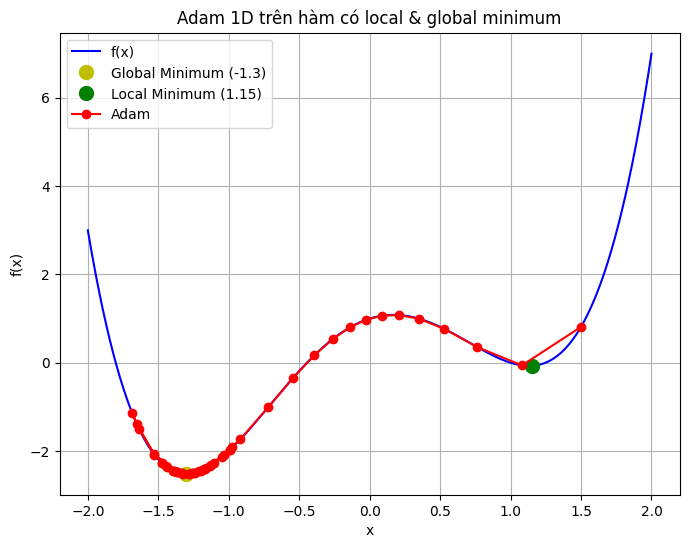

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm 1D và đạo hàm
def f(x):
    return x**4 - 3*x**2 + x + 1

def grad_f(x):
    return 4*x**3 - 6*x + 1

# Adam implementation (1D)
def adam_1d(x0, lr=0.1, epochs=30, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = x0
    m = 0  # first moment (momentum)
    v = 0  # second moment (RMS)
    history = []

    for epoch in range(1, epochs+1):
        g = grad_f(x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2
        m_hat = m / (1 - beta1**epoch)
        v_hat = v / (1 - beta2**epoch)
        x = x - lr * m_hat / (np.sqrt(v_hat) + epsilon)
        history.append((x, f(x)))
        print(f"Epoch {epoch:02d}: x={x:.4f}, f(x)={f(x):.4f}")

    return history

# Khởi tạo
history_adam = adam_1d(2, lr=0.5, epochs=50)

# Vẽ quá trình cập nhật
x_plot = np.linspace(-2, 2, 1000)
y_plot = f(x_plot)
plt.figure(figsize=(8,6))
plt.plot(x_plot, y_plot, color='blue', label='f(x)')

# Local minimum
local_min_x = -1.3
local_min_y = function(local_min_x)
plt.plot(local_min_x, local_min_y, 'yo', label='Global Minimum (-1.3)', markersize=10)

# Global minimum
global_min_x = 1.15
global_min_y = function(global_min_x)
plt.plot(global_min_x, global_min_y, 'go', label='Local Minimum (1.15)', markersize=10)

x_hist = [h[0] for h in history_adam]
y_hist = [h[1] for h in history_adam]
plt.plot(x_hist, y_hist, 'ro-', label='Adam')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Adam 1D trên hàm có local & global minimum')
plt.grid(True)
plt.legend()
plt.show()

**Nhận xét**

- Adam kết hợp **momentum (m)** và **adaptive learning rate (v)**, nên vừa **tăng tốc hội tụ**, vừa **giữ khả năng thoát local minimum**.  
- Quá trình cập nhật thể hiện **biến động mạnh trong giai đoạn đầu**, nhưng nhanh chóng tiến về global minimum (x ≈ -1.37).  
- So với Adagrad và RMSprop:  
  - **Adagrad**: dễ bị kẹt local minimum.  
  - **RMSprop**: thoát local minimum nhưng chưa tận dụng momentum nhiều, tốc độ hội tụ chậm hơn.  
  - **Adam**: vừa thoát local minimum, vừa hội tụ nhanh nhờ momentum + adaptive LR.  
- Nhược điểm: Trong một số landscape phức tạp, Adam có thể **dao động xung quanh minimum** do momentum, cần tuning lr và beta1/beta2.  

**Kết luận**: Adam là **optimizer mạnh mẽ, linh hoạt**, phù hợp cho các hàm có nhiều local minima.


### **Tại sao Adam phổ biến hiện nay**

- **Kết hợp ưu điểm của Momentum và RMSprop**: Adam vừa sử dụng thông tin momentum để giảm dao động và tăng tốc hội tụ, vừa điều chỉnh learning rate thích ứng cho từng tham số như RMSprop.  
- **Ổn định và nhanh chóng**: Trong hầu hết các bài toán deep learning, Adam hội tụ nhanh hơn so với SGD, Adagrad hay RMSprop thuần túy.  
- **Ít cần tuning learning rate**: Nhờ adaptive learning rate, Adam ít nhạy với việc chọn learning rate ban đầu hơn các optimizer cổ điển.  
- **Ứng dụng rộng rãi**: Được chứng minh hiệu quả trong NLP, CV, reinforcement learning, và nhiều mô hình mạng sâu khác.  

**Tóm lại:** Adam là sự kết hợp thông minh giữa tốc độ học thích ứng và momentum, giúp training nhanh, ổn định, và ít phụ thuộc tuning hyperparameter.

**Comparison of Optimizers in Neural Networks**


[Source](https://tiddler.github.io/optimizers)

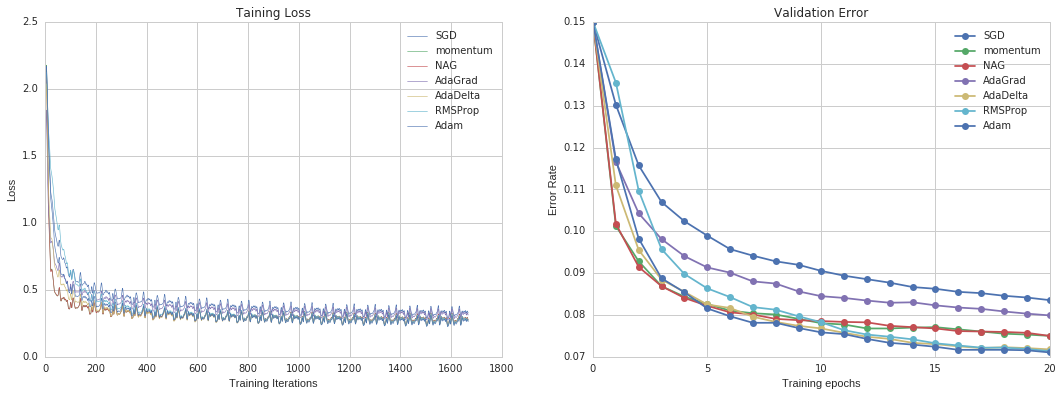